# **Pandas**

It is an open-source library that provides high-performance data manipulation in python. It is built on top of the NumPy package which means NumPy is required for oparating the pandas.

---
It can perform five significant steps required for processing and analysis of data irrespective of the origin of the data. i.e. Load, Manipulate, Prepare, Model, and Analyze. 

---
It provides two data structures for processing:
1.   [Series](#series)
2.   [DataFrame](#dataframe)



<a name="series"></a>
**Series**

It is defined as a one-dimentional array that is capable of storing various data types. The row labels of series are called the index. We can easily convert ndarray, Scalar values, List, Tuple, Dictionary into series using series method. A series can not contain multiple columns.

---
A series is like a fixed size dictionary in that you can get and set values by index label.

**Series object attributes**

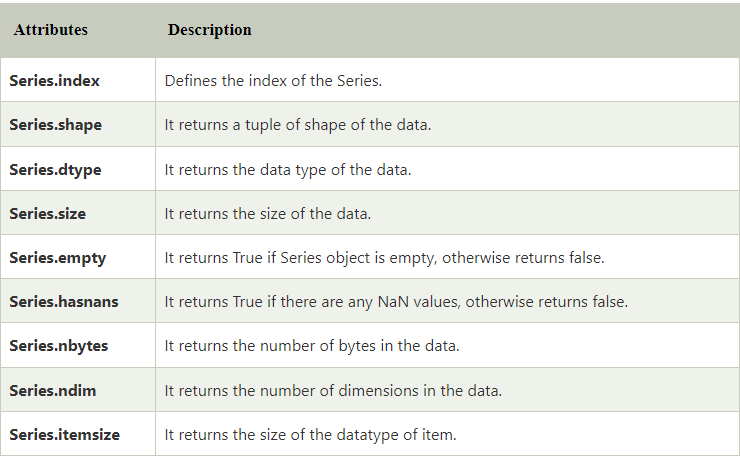



In [ ]:
def printf(p):
  print(">>><<<")
  print(p)

In [ ]:
p = 10
printf(p)

>>><<<
10


In [ ]:
import numpy as np
import pandas as pd

s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
printf(s)
printf(s.index)
printf(pd.Series(np.random.randn(5)))
printf(s.values)
printf(s[0])
printf(s[:3])
printf(s[s > s.median()])
printf(s[[4, 3, 1]])
printf(np.exp(s))
printf(s.dtype)
printf(s.array)
printf(s.to_numpy())


>>><<<
a   -1.217026
b   -0.773280
c    0.429732
d    0.635571
e   -1.453680
dtype: float64
>>><<<
Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
>>><<<
0   -0.080371
1   -0.250497
2   -0.004462
3   -0.350250
4    1.999569
dtype: float64
>>><<<
[-1.2170264  -0.77327963  0.42973187  0.63557121 -1.45368008]
>>><<<
-1.2170264014176608
>>><<<
a   -1.217026
b   -0.773280
c    0.429732
dtype: float64
>>><<<
c    0.429732
d    0.635571
dtype: float64
>>><<<
e   -1.453680
d    0.635571
b   -0.773280
dtype: float64
>>><<<
a    0.296109
b    0.461497
c    1.536845
d    1.888100
e    0.233709
dtype: float64
>>><<<
float64
>>><<<
<PandasArray>
[-1.2170264014176608, -0.7732796313831342, 0.42973186971568705,
  0.6355712079282841, -1.4536800753863133]
Length: 5, dtype: float64
>>><<<
[-1.2170264  -0.77327963  0.42973187  0.63557121 -1.45368008]


In [ ]:
# create an empty series 
pd.Series()  


<ipython-input-3-d0d13b8ad88e>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series()


Series([], dtype: float64)

In [ ]:
d = {"b": 1, "a": 0, "c": 2}
s=pd.Series(d)
printf(s)
# If an index is passed, the values in data corresponding to the labels in the index will be pulled out.
printf(pd.Series(d, index=["b", "c", "d", "a"]))
printf(s["a"])
printf("c" in s)
# Using the get method, a missing label will return None or specified default:
printf(s.get("f",np.nan))
printf(s*2)
'''A key difference between Series and ndarray is that operations between Series
automatically align the data based on label. Thus, you can write computations without
giving consideration to whether the Series involved have the same labels.'''
printf(s[1:] + s[:-1])
 # Views unique values and counts
printf(s.value_counts(dropna=False))

printf(s.iloc[0]) # (Integer location) Selection by position (selects first element)
printf(s.loc['a']) # Selection by index (selects element at index 0)

s.fillna(s.mean()) # Replaces all null values with the mean (mean can be replaced with almost any function from the statistics section)
s.astype(float) # Converts the datatype of the series to float
s.replace(1,'one') # Replaces all values equal to 1 with 'one'
s.replace([1,3],['one','three']) # Replaces all 1 with 'one' and 3 with 'three'


>>><<<
b    1
a    0
c    2
dtype: int64
>>><<<
b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64
>>><<<
0
>>><<<
True
>>><<<
nan
>>><<<
b    2
a    0
c    4
dtype: int64
>>><<<
a    0.0
b    NaN
c    NaN
dtype: float64
>>><<<
2    1
1    1
0    1
dtype: int64
>>><<<
1
>>><<<
0


b    one
a      0
c      2
dtype: object

<a name="dataframe"></a>
**DataFrame**

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:


*   Dict of 1D ndarrays, lists, dicts, or Series
*   2-D numpy.ndarray
*   Structured or record ndarray
*   A Series
*   Another DataFrame

Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments.

DataFrame is defined as a standard way to store data that has two different indexes, i.e., row index and column index.


In [ ]:
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}
# If no index is passed, the result will be range(n), where n is the array length.
df = pd.DataFrame(d)
printf(df)
printf(pd.DataFrame(d, index=["d", "b", "a"]))
printf(pd.DataFrame(d, index=["d", "b", "a"], columns=["two", "three"]))
printf(df.index)
printf(df.columns)

>>><<<
   one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0
>>><<<
   one  two
d  NaN  4.0
b  2.0  2.0
a  1.0  1.0
>>><<<
   two three
d  4.0   NaN
b  2.0   NaN
a  1.0   NaN
>>><<<
Index(['a', 'b', 'c', 'd'], dtype='object')
>>><<<
Index(['one', 'two'], dtype='object')


**Column selection, addition, deletion**

You can treat a DataFrame semantically like a dict of like-indexed Series objects. Getting, setting, and deleting columns works with the same syntax as the analogous dict operations:

In [ ]:
printf(df["one"])

df["three"] = df["one"] * df["two"]

df["flag"] = df["one"] > 2

printf(df)

del df["two"]

three = df.pop("three")
df["foo"] = "bar"
df["one_trunc"] = df["one"][:2]
# The insert function is available to insert at a particular location in the columns:
df.insert(1, "bar", df["one"])

df

>>><<<
a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64
>>><<<
   one  two  three   flag
a  1.0  1.0    1.0  False
b  2.0  2.0    4.0  False
c  3.0  3.0    9.0   True
d  NaN  4.0    NaN  False


,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


 DataFrame has an assign() method that allows you to easily create new columns that are potentially derived from existing columns. **assign** always returns a copy of the data, leaving the original DataFrame untouched.

In [ ]:
df.assign(three=df["one"] / df["bar"]).head()

,one,bar,flag,foo,one_trunc,three
a,1.0,1.0,False,bar,1.0,1.0
b,2.0,2.0,False,bar,2.0,1.0
c,3.0,3.0,True,bar,NaN,1.0
d,NaN,NaN,False,bar,NaN,NaN


**Indexing / selection**
The basics of indexing are as follows:
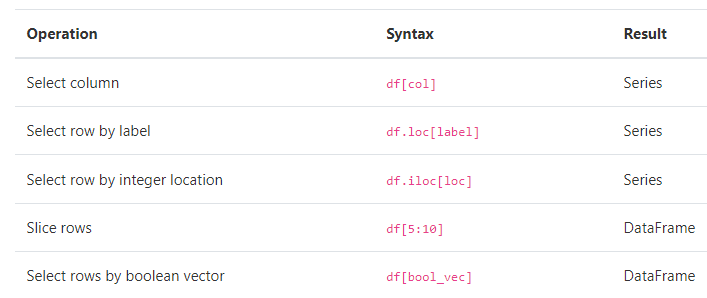


**Data alignment and arithmetic**

Data alignment between DataFrame objects automatically align on both the columns and the index (row labels). Again, the resulting object will have the union of the column and row labels.

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B", "C", "D"])

df2 = pd.DataFrame(np.random.randn(7, 3), columns=["A", "B", "C"])

printf(df + df2)
'''When doing an operation between DataFrame and Series, the default behavior is to align
the Series index on the DataFrame columns, thus broadcasting row-wise.'''
printf(df)
df - df.iloc[0]
#df * 5 + 2
#1 / df
#df ** 4
#printf(df) # df did not changed


>>><<<
          A         B         C   D
0  2.524006  1.124754  0.560248 NaN
1  0.276948  3.810998  0.706951 NaN
2 -0.971986 -0.363612  0.863037 NaN
3  0.313614 -2.550822 -0.193994 NaN
4  2.802753  0.873075  1.041305 NaN
5  0.714172 -2.833712 -0.466686 NaN
6  1.524364 -0.082675 -1.063761 NaN
7       NaN       NaN       NaN NaN
8       NaN       NaN       NaN NaN
9       NaN       NaN       NaN NaN
>>><<<
          A         B         C         D
0  0.042295  0.926320  0.893986 -0.046298
1  0.633503  2.423010  1.343508  0.532466
2  1.085062  0.533574 -1.307324  1.396151
3 -0.320750 -1.158918  0.900342 -0.614263
4  0.286307  0.223120 -0.166706 -1.012690
5 -0.473496 -0.648127  0.140492  0.189748
6  0.787150 -0.736501 -1.329947 -0.282376
7  0.964588  0.602101  0.891372 -0.477880
8  0.142855 -0.637321 -0.420720  0.912677
9 -0.693748  1.392444  1.548747  0.599552


,A,B,C,D
0,0.000003,0.736282,0.638738,0.000005
1,0.161062,34.468372,3.258077,0.080384
2,1.386174,0.081055,2.921009,3.799531
3,0.010584,1.803891,0.657098,0.142369
4,0.006719,0.002478,0.000772,1.051735
5,0.050265,0.176458,0.000390,0.001296
6,0.383910,0.294235,3.128504,0.006358
7,0.865700,0.131425,0.631301,0.052152
8,0.000416,0.164981,0.031331,0.693855
9,0.231636,3.759339,5.753367,0.129214


In [ ]:
# Boolean operators work as well:
df1 = pd.DataFrame({"a": [1, 0, 1], "b": [0, 1, 1]}, dtype=bool)

df2 = pd.DataFrame({"a": [0, 1, 1], "b": [1, 1, 0]}, dtype=bool)

df1 & df2
#df1 | df2
#df1 ^ df2 # XOR
#-df1

# Transposing
#printf(df1)
#df1[:5].T

>>><<<
       a      b
0   True  False
1  False   True
2   True   True


,0,1,2
a,True,False,True
b,False,True,True


**DataFrame interoperability with NumPy functions**

In [ ]:
np.exp(df1)

,a,b
0,2.71875,1.00000
1,1.00000,2.71875
2,2.71875,2.71875


In [ ]:
np.asarray(df1)

array([[ True, False],
       [False,  True],
       [ True,  True]])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a       3 non-null      bool 
 1   b       3 non-null      bool 
dtypes: bool(2)
memory usage: 134.0 bytes


In [ ]:
df.std()

A    0.618165
B    1.116754
C    1.037546
D    0.747664
dtype: float64

In [ ]:
printf(df[1:2]) #Slice Rows
printf(df.drop(1))#Deletion of rows: Drop rows with label 1
printf(df.drop('A',axis=1))

>>><<<
          A        B         C         D
1  0.633503  2.42301  1.343508  0.532466
>>><<<
          A         B         C         D
0  0.042295  0.926320  0.893986 -0.046298
2  1.085062  0.533574 -1.307324  1.396151
3 -0.320750 -1.158918  0.900342 -0.614263
4  0.286307  0.223120 -0.166706 -1.012690
5 -0.473496 -0.648127  0.140492  0.189748
6  0.787150 -0.736501 -1.329947 -0.282376
7  0.964588  0.602101  0.891372 -0.477880
8  0.142855 -0.637321 -0.420720  0.912677
9 -0.693748  1.392444  1.548747  0.599552
>>><<<
          B         C         D
0  0.926320  0.893986 -0.046298
1  2.423010  1.343508  0.532466
2  0.533574 -1.307324  1.396151
3 -1.158918  0.900342 -0.614263
4  0.223120 -0.166706 -1.012690
5 -0.648127  0.140492  0.189748
6 -0.736501 -1.329947 -0.282376
7  0.602101  0.891372 -0.477880
8 -0.637321 -0.420720  0.912677
9  1.392444  1.548747  0.599552


##Exploring Dataframe

```
DataFrame.apply() #pass a function and apply it to every single value of the Pandas series.
DataFrame.aggregate() #apply some aggregation to one or more column.
DataFrame.count() #used to count the number of non-NA cells for each column or row.
DataFrame.cut() #invoked when you need to segment and sort the data values into bins. It is used to convert a continuous variable to a categorical variable
DataFrame.describe() #used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame.
DataFrame.drop_duplicates() #performs common data cleaning task that deals with duplicate values in the DataFrame. 
DataFrame.groupby() #Its primary task is to split the data into various groups.
DataFrame.hist() #It is also a useful tool that quickly access the probability distribution.
DataFrame.iterrows() #loop over the DataFrame for performing some operations on each of the rows then you can use iterrows() function in Pandas.
DataFrame.join() #concatenate our DataFrames
DataFrame.mean() #used to return the mean of the values for the requested axis.
DataFrame.query() #method to filter the DataFrame. 
DataFrame.rename() #to rename any index, column, or row.
Dataframe.sample() #used to select the rows and columns from the DataFrame randomly.
DataFrame.sort() #erform sorting in the DataFrame through different kinds: By label or By Actual value
DataFrame.sum() #return the sum of the values for the requested axis
DataFrame.where() #check the data frame for one or more conditions and return the result accordingly. By default, if the rows are not satisfying the condition, it is filled with NaN value.
```



In [1]:
import pandas as pd
df=pd.read_csv('/content/diabetes (2).csv')

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df['Pregnancies'].mean()

3.8450520833333335

In [5]:
df.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [6]:
df.std()

Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
dtype: float64

In [7]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [8]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [9]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64